<div><img style="float: left; padding-right: 3em;" src="https://avatars.githubusercontent.com/u/19476722" width="150" /><div/>

# Earth Data Science Coding Challenge!
Before we get started, make sure to read or review the guidelines below. These will help make sure that your code is **readable** and **reproducible**. 

## Don't get **caught** by these Jupyter notebook gotchas

<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*o0HleR7BSe8W-pTnmucqHA.jpeg" width=300 style="padding: 1em; border-style: solid; border-color: grey;" />

  > *Image source: https://alaskausfws.medium.com/whats-big-and-brown-and-loves-salmon-e1803579ee36*

These are the most common issues that will keep you from getting started and delay your code review:

1. When you try to run some code on GitHub Codespaces, you may be prompted to select a **kernel**.
   * The **kernel** refers to the version of Python you are using
   * You should use the **base** kernel, which should be the default option. 
   * You can also use the `Select Kernel` menu in the upper right to select the **base** kernel
2. Before you commit your work, make sure it runs **reproducibly** by clicking:
   1. `Restart` (this button won't appear until you've run some code), then
   2. `Run All`

## Check your code to make sure it's clean and easy to read

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSO1w9WrbwbuMLN14IezH-iq2HEGwO3JDvmo5Y_hQIy7k-Xo2gZH-mP2GUIG6RFWL04X1k&usqp=CAU" height=200 />

* Format all cells prior to submitting (right click on your code).
* Use expressive names for variables so you or the reader knows what they are. 
* Use comments to explain your code -- e.g. 
  ```python
  # This is a comment, it starts with a hash sign
  ```

## Label and describe your plots

![Source: https://xkcd.com/833](https://imgs.xkcd.com/comics/convincing.png)

Make sure each plot has:
  * A title that explains where and when the data are from
  * x- and y- axis labels with **units** where appropriate
  * A legend where appropriate


## Icons: how to use this notebook
We use the following icons to let you know when you need to change something to complete the challenge:
  * &#128187; means you need to write or edit some code.
  
  * &#128214;  indicates recommended reading
  
  * &#9998; marks written responses to questions
  
  * &#127798; is an optional extra challenge
  

---

# In  2019 there were floods across the Midwestern US
![Inland floods in the Midwest - houses partially submerged in brown water](https://nationalfloodservices.com/wp-content/uploads/2020/09/midwest-flood-blog-1.png)

> Image source: <a src=https://nationalfloodservices.com/blog/the-2019-midwestern-floods-the-insidious-damage-of-inland-flooding/> National Flood Services - The 2019 Midwestern Floods</a>

From March to December 2019, large parts of the midwestern U.S. were flooded. What happened to cause this flooding? What impacts did the flooding have? Before we look at data about the flooding, we need to check out what other sources are saying about it.

&#128214; Here are some resources from different sources to get you started:
  * [The New York Times](https://www.nytimes.com/interactive/2019/09/11/us/midwest-flooding.html)
  * [National Flood Services](https://nationalfloodservices.com/blog/the-2019-midwestern-floods-the-insidious-damage-of-inland-flooding/)

&#128172; If you or someone you know have experience with this site, or 
were there during the floods, we also invite you to write about that.

## STEP 1: Set up Python

Use the cell below to add necessary **package imports** to this notebook. It's best to import everything in your very first code cell because it helps folks who are reading your code to figure out where everything comes from (mostly right now this is **you** in the future). It's *very* frustrating to try to figure out what packages need to be installed to get some code to run.

&#128214; Our friend [the PEP-8 style guide has some things to say about imports](https://peps.python.org/pep-0008/#imports). In particular - **standard library packages** should be listed at the top. These are packages that you don't need to install because they come with Python. You can check if a package is part of the standard library by searching the [Python Standard Library documentation page](https://docs.python.org/3/library/). 

&#128187; Your task:
  * **Uncomment** all the import lines below. HINT: Use the `CMD`-`/` shortcut to uncomment many lines at once.
  * Add the **library for working with DataFrames in Python** to the imports, as well as the **hvplot extension**
  * Separate the **standard library package(s)** at the top
  * Run and test your import cell to make sure everything will work

In [24]:
import subprocess

from io import BytesIO

import folium
import hvplot.pandas as hv
import pandas as pd
import requests


In [25]:
# RUN THIS CELL TO TEST YOUR CODE - DO NOT MODIFY!
import_pts = 0

# Check that pandas has been imported properly
try:
    pd.DataFrame()
    import_pts += 1
    print('\u2705 Great work! '
          'You correctly imported the pandas library.')
except:
    print('\u274C Oops - pandas was not imported correctly.')
    
# Check that hvplot has been imported
try:
    pd.DataFrame().hvplot
    import_pts += 1
    print('\u2705 Great work! '
          'You correctly imported the hvplot.pandas library.')
except:
    print('\u274C Oops - hvplot.pandas was not imported correctly.')

# Subtract one point for any PEP-8 errors
tmp_path = "tmp.py"
with open(tmp_path, "w") as tmp_file:
    tmp_file.write(In[-2])
ignore_flake8 = 'W292,F401,E302'
flake8_out = subprocess.run(
    ['flake8', 
     '--ignore', ignore_flake8, 
     '--import-order-style', 'edited',
     '--count', 
     tmp_path],
    stdout=subprocess.PIPE,
).stdout.decode("ascii")
print(flake8_out)
import_pts -= int(flake8_out.splitlines()[-1])

print(
    "\n \u27A1 You received {} out of 2 points.".format(import_pts)
)

import_pts

✅ Great work! You correctly imported the pandas library.
✅ Great work! You correctly imported the hvplot.pandas library.
0


 ➡ You received 2 out of 2 points.


2

## STEP 2: SITE MAP AND DESCRIPTION


### Near Omaha, NE, roads were flooded and levees overflowed

![The Platte and Missouri rivers overflow their banks. Before and after images show a large extent of land outside the usual riverbanks flooded.](https://nationalfloodservices.com/wp-content/uploads/2020/09/Historic_floods_have_inundated_Nebraska_40463013783.jpg)

> Image Source: [National Flood Services](https://nationalfloodservices.com/blog/the-2019-midwestern-floods-the-insidious-damage-of-inland-flooding/)

To start, you'll be focusing on the Missouri River at Omaha, a few miles north of where this image above depicts the junctions of the Platte and Missouri Rivers. Then, you'll pick your own site that was affected by a flood.

### Site Description

&#9998; In the cell below, describe the Omaha area and/or the Missouri River in a few sentences. 
You can include:
  * Information about the **climatology** of the area, or typical 
  precipitation and temperature at different months of the year
  * You don't need to include a **runoff ratio** (average annual runoff divided by average annual precipitation) for a river this large, since it would be hard to find and not as meaningful. If you are working with small watersheds you should definitely report this number. Check out the [GAGES II dataset](https://water.usgs.gov/GIS/dsdl/basinchar_and_report_sept_2011.zip)
  * Which **wildlife and ecosystems** exist in the area
  * What **communities and infrastructure** are in the area

Omaha is located in the eastern part of Nebraska, near the banks of the Missouri River. The climatology of the Omaha area experiences distinct seasons, with cold winters and warm summers. In winter, temperatures can drop below freezing, while summer brings hot and humid conditions. Spring and fall are transitional periods with milder weather. Precipitation is fairly evenly distributed throughout the year, with slightly more rainfall during the spring and early summer months.

The Missouri River, which flows through Omaha, is a major waterway in the region. It supports diverse wildlife and ecosystems along its banks. The river's ecosystem includes various fish species, including catfish and sturgeon, as well as waterfowl and migratory birds. Wetlands and floodplains adjacent to the river are essential for many species of plants and animals.

Omaha is a thriving urban community with a range of infrastructure and amenities. It is the largest city in Nebraska and serves as a cultural and economic hub for the region. The city features a mix of residential, commercial, and industrial areas. Omaha is known for its vibrant arts scene, educational institutions, and a variety of recreational opportunities. Additionally, the city's infrastructure includes a network of roads, bridges, and public transportation systems to support its growing population and economic activities.

### Site Map: The Missouri River near Omaha

The code below will create an interactive map of the area using the **folium**
library. But something is wrong - no one defined the names latitude and longitude.

&#128187; Your task:
  * Find the location of the Missouri River near Omaha **USGS stream gauge** using the [National Water Information System](https://waterdata.usgs.gov/nwis?). This is not the easiest thing to find if you aren't used to NWIS, so you can use the following instructions to get started:
      * Go to the [National Water Information System Mapper](https://dashboard.waterdata.usgs.gov/app/nwd/en/)
      * Type in `Omaha` in the `Find a Place` box and pick the one in Nebraska (NE)
      * Click on the Missouri River near Omaha site. It should open a new window.
      * Click on `Site page` at the top.
      * Scroll to the bottom and open the `Location metadata` section. There you will find the latitude and longitude as decimal values.
  * Define latitude and longitude variables to **match the variable names 
    used in the code**.
  * Change the current label, "Thingy" to be descriptive of the site.
  * Run and test your cell to make sure everything works.

&#127798; EXTRA CHALLENGE: Customize your folium plot [using the folium documentation](https://python-visualization.github.io/folium/quickstart.html#Getting-Started). For example, you could:
  * Change the base map images
  * Change the initial zoom

In [26]:
# YOUR CODE HERE
# raise NotImplementedError()

sg_lat =  41.25905556 
sg_lon = -95.92325 

# Initialize map and tweak settings
m = folium.Map(
    # Location to display
    location=(sg_lat, sg_lon),
    # Delay setting Tile Basemap
    tiles=None,
    # Change the initial zoom
    zoom_start=15, 
    # Turns off annoying zooming while trying to scroll to the next cell
    scrollWheelZoom=False)

# Change the basemap images
folium.raster_layers.TileLayer(tiles='Stamen Terrain').add_to(m)

# Put a marker at the stream gauge location
folium.Marker([sg_lat, sg_lon], popup="Missouri River at Omaha, NE - 06610000").add_to(m)

# Add a Title
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Gauge Location</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

# Display the map
m

## STEP 3: DOWNLOAD TIME SERIES DATA

### One way to express how big a flood is by estimating how often larger floods occur.

For example, you might have heard news media talking about a "100-year flood". 

Next, you will write Python code to download and work with a **time series** of streamflow data during the flooding on the Missouri River.

> A **time series** of data is taken at the same location but collected regularly or semi-regularly over time. 

You will then consider how the values compared to previous years before the flood event by computing the flood's **return period**.

> A **return period** is an estimate of how often you might expect to see a flood of at least a particular size. This does *NOT* mean an extreme flood "has" to occur within the return period, or that it couldn't occur more than once.

&#128214; Here are some resources from your textbook you can review to learn more:
  * [Introduction to time-series data](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/)
  * [Flood return period and probability](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/floods-return-period-and-probability/)

&#9998; In the cell below, explain what data you will need to complete this analysis, including:
  1. What type or types of data do you need?
  2. How many years of data do you think you need to compute the return period of an extreme event like the 2019 Omaha floods?

1. We will need time series data for stream discharge, mean and max ideally.

2. In order to assess when a 100-year flood is likely to occur, we will need multiple hundreds of years to evaluate the likeliness. If looking at decades of flooding highgs, then look at decades of data.

### US streamflow data are available from the National Water Information Service (NWIS) 

&#128187; Practice downloading the data you need using the NWIS website. **You will not use your downloaded data in the analysis, but you must follow these steps to get the correct urls.** In the cell below, use the following instructions to get urls for downloading the USGS data:

1. Go back to the Missouri River near Omaha station page.
2. This time, click `Data` instead of `Site Page`
3. Select `Daily Data` from the list of datasets.
4. Select the date range from October 1, 1928 to September 30, 2022, set your results to be as `Tab-separated`, and press `Go`.
    > NOTE: For hydrologic data, we often use the **Water Year**, which starts the  October before in order to capture the full snow season. In this case, we are downloading WY1928-WY2022
5. Copy the url that populates in your browser window and paste it below. You don't need to save the data - we will do that using Python.
    

&#9998; USGS streamflow URL: https://waterdata.usgs.gov/nwis/dv?cb_00010=on&cb_00010=on&cb_00060=on&cb_00095=on&cb_80154=on&cb_80155=on&cb_90095=on&format=rdb&site_no=06610000&legacy=&referred_module=sw&period=&begin_date=1928-10-01&end_date=2022-09-30

#### Exploring the NWIS API

One way to access data is through an **Application Programming Interface**, or **API**. The URL you've just found is an example of a simple, public API. All the parameters of your data search are visible in the URL. For example, to get data starting in 2015, we could change `begin_date=1991-10-01` to `begin_date=2015-01-01`)

 &#9998; In the cell below - what parameter would you change in the USGS url if you wanted to switch locations?


The site is referred to as "USGS 06610000 Missouri River at Omaha, NE". So the parameter you would need to changed locations would be the site_no=06610000 within the url.

### Data description and citation

&#9998; In the cell below, describe your data. Include the following information:
  1. A 1-2 sentence description of the data
  2. Data citation
  3. What are the units?
  4. What is the time interval for each data point?
  5. Is there a "no data" value, or a value used to indicate when the sensor was broken or didn't detect anything? (These are also known as NA, N/A, NaN, nan, or nodata values)

&#128214; The [NWIS data format page](https://waterdata.usgs.gov/nwis/?tab_delimited_format_info) might be helpful.

1. This dataset contains daily data of different parameters, including discharge, temperature, and suspended sediment discharge, for data between October 1st, 1928 to September 30th, 2022 for the USGS 06610000 Missouri River at Omaha, NE site.

2. Data citation: United States Geological Survey,  Daily Data for the USGS 06610000 Missouri River at Omaha, NE site from October 1st, 1928 to September 30th, 2022,  accessed October 2, 2023, at https://waterdata.usgs.gov/nwis/dv?cb_00010=on&cb_00010=on&cb_00060=on&cb_00095=on&cb_80154=on&cb_80155=on&cb_90095=on&format=rdb&site_no=06610000&legacy=&referred_module=sw&period=&begin_date=1928-10-01&end_date=2022-09-30

3. Units: 
* Discharge, cubic feet per second

* Temperature, water, degrees Celsius

* Specific conductance, water, unfiltered, microsiemens per centimeter at 25 degrees Celsius

* Suspended sediment concentration, milligrams per liter

* Suspended sediment discharge, short tons per day

* Specific conductance, water, unfiltered, laboratory, microsiemens per centimeter at 25 degrees Celsius 

* Temperature, water, degrees Celsius

4. Data Time Interval: 
* Discharge,(Mean)

* Temperature, water, (Instantaneous)

* Specific conductance, water, unfiltered, (Instantaneous)

* Suspended sediment concentration, (Mean)

* Suspended sediment discharge, (Mean)

* Specific conductance, water, unfiltered, laboratory,  (Instantaneous)

* Temperature, (Mean)

5. The only data-value quantification codes in includes are so there is no signifier for "no data values":   
*     A  Approved for publication -- Processing and review completed.
*     P  Provisional data subject to revision.
*     e  Value has been estimated.
*     4  Statistic computed from less than expected number of instantaneous values for the period

### Download the data

In the cell below complete the following task:

1. Use [the code suggested by ChatGPT for how to request a URL over HyperText Transfer Protocol (HTTP) in Python](https://chat.openai.com/share/ca03fcfd-1264-41a1-a19e-05dd57a842ce) as a starting point for your code.
2. Replace the url in the code below with the USGS NWIS URL you found, and change the variable names to something descriptive.
   > HINT: URLs are a type of Python object called a `string`. Make sure you put quotes around your URL so that Python knows how to interpret it!
3. Call the response object at the end of the cell.

In [27]:
# YOUR CODE HERE
# raise NotImplementedError()
import requests

# Replace with the URL you want to request
omaha_data_url = ("https://waterdata.usgs.gov/nwis/dv?cb_00010=on&"
                  "cb_00010=on&cb_00060=on&cb_00095=on&cb_80154=on&cb"
                  "_80155=on&cb_90095=on&format=rdb&site_no=06610000&"
                  "legacy=&referred_module=sw&period=&begin_date=1928"
                  "-10-01&end_date=2022-09-30")

# Send an HTTP GET request to the URL
omaha_data = requests.get(omaha_data_url)

# Check if the request was successful (status code 200)
if omaha_data.status_code == 200:
    # Print the content of the response (HTML, JSON, etc.)
    print(omaha_data.text)
else:
    print(f"Request failed with status code {omaha_data.status_code}")

# ---------------------------------- WARNING ----------------------------------------
# Some of the data that you have obtained from this U.S. Geological Survey database
# may not have received Director's approval. Any such data values are qualified
# as provisional and are subject to revision. Provisional data are released on the
# condition that neither the USGS nor the United States Government may be held liable
# for any damages resulting from its use.
#
# Additional info: https://help.waterdata.usgs.gov/policies/provisional-data-statement
#
# File-format description:  https://help.waterdata.usgs.gov/faq/about-tab-delimited-output
# Automated-retrieval info: https://help.waterdata.usgs.gov/faq/automated-retrievals
#
# Contact:   gs-w_waterdata_support@usgs.gov
# retrieved: 2023-10-10 20:11:22 EDT       (caww01)
#
# Data for the following 1 site(s) are contained in this file
#    USGS 06610000 Missouri River at Omaha, NE
# ------------------------------------------------------------

In [28]:
ans_req = omaha_data
req_pts = 0

if ans_req.ok:
    print('\u2705 Great work! Your download succeeded')
    req_pts += 4
else:
    print('\u274C Hmm, looks like your url is not correct')
    
# Subtract one point for any PEP-8 errors
tmp_path = "tmp.py"
with open(tmp_path, "w") as tmp_file:
    tmp_file.write(In[-2])
ignore_flake8 = 'W292,F401,E302,F821'
flake8_out = subprocess.run(
    ['flake8', 
     '--ignore', ignore_flake8, 
     '--import-order-style', 'edited',
     '--count', 
     tmp_path],
    stdout=subprocess.PIPE,
).stdout.decode("ascii")
print(flake8_out)
req_pts -= int(flake8_out.splitlines()[-1])

print('\u27A1 You earned {} of 4 points for downloading data'.format(req_pts))

req_pts

✅ Great work! Your download succeeded
0

➡ You earned 4 of 4 points for downloading data


4

## STEP 4: CLEAN UP

### You will need to take a look at the raw downloaded data to figure out what import parameters to use with the pandas read_csv() function

&#128187; In the cell below, replace `response` with the name of the response variable that you defined above.

The code below prints the first 10 lines of your download and numbers them. Does this look like streamflow data to you?

In [29]:
# Print the top of the data
for i, line in enumerate(omaha_data.content.splitlines()[:10]):
    print(i, line)

0 b'# ---------------------------------- WARNING ----------------------------------------'
1 b'# Some of the data that you have obtained from this U.S. Geological Survey database'
2 b"# may not have received Director's approval. Any such data values are qualified"
3 b'# as provisional and are subject to revision. Provisional data are released on the'
4 b'# condition that neither the USGS nor the United States Government may be held liable'
5 b'# for any damages resulting from its use.'
6 b'#'
7 b'# Additional info: https://help.waterdata.usgs.gov/policies/provisional-data-statement'
8 b'#'
9 b'# File-format description:  https://help.waterdata.usgs.gov/faq/about-tab-delimited-output'


In the [NWIS documentation](https://waterdata.usgs.gov/nwis/?tab_delimited_format_info), they say that you can ignore lines that start with a hash sign (#) because they are **commented**. When we use pandas to import the data, we'll be able to tell it what character indicates a comment, but we're not there yet. The code below again prints the first 35 lines of the response content, this time skipping all commented lines. 

&#128187; In the cell below, replace `response` with the name of the response variable that you defined above. Then run the code.

In [30]:
# Take a look at the data. What got downloaded?
for i, line in enumerate(omaha_data.content.splitlines()[:35]):
    # Skip commented lines
    if not line.startswith(b'#'):
        print(i, line)  


&#9998; What do you notice about the data now? In the following cell, write down your thoughts on:
  * What separator or **delimiter** does the data use to separate columns?
  * What should the data types of each column be?
  * Which column contains the streamflow data?
  * Do you need to skip any rows that don't contain data?
  * Which column do you think makes sense as the **index** (unique identifier) for each row?
  * Is there anything else strange?

The answers to the questions above will help you figure out what parameters to use with the `pd.read_csv()` function.

* Delimeter: Tab
* Data Types of Each column: Most are integers, but the agency_cd column and other cd columns should be strings
* Streamflow: Discharge column 43245_00060_00003
* Skip any rows that don't contain data: No
* Index column should be the date column as there is one data point per day.
* Strange: Might need to keep a lookout for the different data quantification when analyzing the data, may want to remove some of those.


### Now we're ready to import the data with pandas. 

Notice that when you print your downloaded data, each line has a `b` in front of it. The `b` stands for "bytes". In order for pandas to be able to read the data, we need to **decode** it so each line is a regular string. In the cell below, we do this using the `io.BytesIO` function, which tricks `pandas` into thinking it is reading a binary file.

&#128187; Your task:

Paste the following code in the cell below:
```python
pd.read_csv(
    BytesIO(nwis_response.content),
    # comment='',
    # delimiter='', 
    # skiprows=[],
    # names=[],
    # index_col='',
    # parse_dates=True,
)
```

Then:
  1. Replace `response` with the name of your HTTP Response variable
  2. Uncomment the code below, **one line at a time**, running the code and making corrections in-between.
  3. Using the observations you made above, add the necessary values to get `pandas` to correctly import the data.
  4. Make sure to include units in your column names where applicable! What units are these streamflow measurements?

In [31]:
# YOUR CODE HERE
# raise NotImplementedError()
from io import BytesIO

import pandas as pd

# Define Custom Names for the data columns
names = [
    'data_provider',  # agency_cd
    'site_number',  # site_no
    'yyyy_mm_dd',  # datetime
    'discharge_cubic_feet_second_mean',  # 43245_00060_00003
    'discharge_cubic_feet_second_mean_cd',  # 43245_00060_00003_cd
    'temp_celsius_instantaneous',  # 43246_00010_00011
    'temp_celsius_instantaneous_cd',  # 43246_00010_00011_cd
    'conductance_microsiemens_cm_instantaneous',  # 43247_00095_00011
    'conductance_microsiemens_cm_instantaneous_cd',  # 43247_00095_00011_cd
    'sediment_concentration_milligrams_liter_mean',  # 43248_80154_00003
    'sediment_concentration_milligrams_liter_mean_cd',  # 43248_80154_00003_cd
    'sediment_discharge_short_tons_day_mean',  # 43249_80155_00003
    'sediment_discharge_short_tons_day_mean_cd',  # 43249_80155_00003_cd
    'lab_conductance_microsiemens_cm_instantaneous',  # 43250_90095_00011
    'lab_conductance_microsiemens_cm_instantaneous_cd',  # 43250_90095_00011_cd
    'temp_celsius_mean',  # 43251_00010_00003
    'temp_celsius_mean_cd',  # 43251_00010_00003_cd
]

df = pd.read_csv(
    BytesIO(omaha_data.content),
    comment='#',
    delimiter='\t',
    skiprows=[36, 37],
    names=names,
    index_col='yyyy_mm_dd',
    parse_dates=True,
)

/tmp/ipykernel_603/1610107746.py:28: DtypeWarning: Columns (6,8,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [32]:
ans_q = df
q_points = 0

if isinstance(ans_q, pd.DataFrame):
    print("\u2705 Great, you created a pandas dataframe above")
    q_points += 1
else:
    print("\u274C Oops - the cell above should have a DataFrame output.")

if type(ans_q.index) == pd.DatetimeIndex:
    print("\u2705 Your DataFrame has the date as the index, "
          "good job!")
    q_points += 2
else:
    print("\u274C Your DataFrame does not have the date "
          "as the index.")

if len(ans_q) == 34333:
    print("\u2705 Your DataFrame is the right length!")
    q_points += 2
else:
    print("\u274C Check your date range.")
    
if round(ans_q.iloc[:,2].mean(), 0)==33219.0:
    print("\u2705 Your streamflow DataFrame has the expected values "
          "in it, good job!")
    q_points += 2
else:
    print("\u274C Your streamflow DataFrame does not have the "
          "expected values in it.")

# Subtract one point for any PEP-8 errors
tmp_path = "tmp.py"
with open(tmp_path, "w") as tmp_file:
    tmp_file.write(In[-2])
ignore_flake8 = 'W292,F401,E302,F821'
flake8_out = subprocess.run(
    ['flake8', 
     '--ignore', ignore_flake8, 
     '--import-order-style', 'edited',
     '--count', 
     tmp_path],
    stdout=subprocess.PIPE,
).stdout.decode("ascii")
print(flake8_out)
q_points -= int(flake8_out.splitlines()[-1])

print("\u27A1 You received {} out of 7 points for opening the "
      "streamflow data.".format(
    q_points))
q_points

✅ Great, you created a pandas dataframe above
✅ Your DataFrame has the date as the index, good job!
✅ Your DataFrame is the right length!
✅ Your streamflow DataFrame has the expected values in it, good job!
0

➡ You received 7 out of 7 points for opening the streamflow data.


7

Let's check your data. A useful method for looking at the **datatypes** in your `pd.DataFrame` is the `pd.DataFrame.info()` method.

> In Python, you will see both **methods** and **functions**. This is an *important and tricky* distinction we'll be talking about a lot. For right now -- functions have all of their arguments/parameters **inside** the parentheses, as in `pd.read_csv(args)`. For **methods**, the first argument is always some kind of Python **object** like a `pd.DataFrame`. Take a look at the next cell for an example of using the `pd.DataFrame.info()` **method**.


&#128187;  Replace `dataframe` with the name of your DataFrame variable

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34333 entries, 1928-10-01 to 2022-09-30
Data columns (total 16 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   data_provider                                     34333 non-null  object 
 1   site_number                                       34333 non-null  int64  
 2   discharge_cubic_feet_second_mean                  34333 non-null  int64  
 3   discharge_cubic_feet_second_mean_cd               34333 non-null  object 
 4   temp_celsius_instantaneous                        2737 non-null   float64
 5   temp_celsius_instantaneous_cd                     2737 non-null   object 
 6   conductance_microsiemens_cm_instantaneous         1599 non-null   float64
 7   conductance_microsiemens_cm_instantaneous_cd      1599 non-null   object 
 8   sediment_concentration_milligrams_liter_mean      11321 non-null  float64
 9   

## STEP 5: PLOT THE DATA

Oops, we have one more problem! Take a look at the data types of your DataFrame columns...

✎ In the cell below, write down what data type you would expect the streamflow column to be. The main options are: Integer, Float, Datetime, or Object.

📖 Check out [this example showing the most common data types for pandas columns](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)

> A **float** is a non-integer number. You can identify them because they have decimal points in Python, unlike integers. We do not call them decimals for a reason - a decimal.Decimal is different, and more precise than, a float in Python. If you are ever working with really, really small numbers, you may need to use decimals, but for most applications floats are fine.

I would expect it to be an integer. It would not be a float because there are not any decimals in the streamflow data.

### Can we see the flood in the streamflow data?

In the cell below, subset the stream discharge data to the same timeframe that you are interested in: February - April, 2019. Save the result to a variable and call it at the end of the cell for testing.

You can find some [examples of subsetting time series data in the textbook](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/subset-time-series-data-python/).

In [34]:
# YOUR CODE HERE
# raise NotImplementedError()

# NOTE! This is actually supposed to be the full water years
# surrounding the year of the flood
# OCt 1 2018 to September 30th 2020.

df_subset = df["2018-10-01":"2020-09-30"]

print((df_subset))

           data_provider  site_number  discharge_cubic_feet_second_mean  \
yyyy_mm_dd                                                                
2018-10-01          USGS      6610000                             94800   
2018-10-02          USGS      6610000                             92600   
2018-10-03          USGS      6610000                             89400   
2018-10-04          USGS      6610000                             86800   
2018-10-05          USGS      6610000                             83900   
...                  ...          ...                               ...   
2020-09-26          USGS      6610000                             35500   
2020-09-27          USGS      6610000                             35300   
2020-09-28          USGS      6610000                             35300   
2020-09-29          USGS      6610000                             35200   
2020-09-30          USGS      6610000                             35300   

           discharge_cub

In [35]:
ans_subset = df_subset
subset_points = 0

# Answer should be a DataFrame
if isinstance(ans_subset, pd.DataFrame):
    print("\u2705 Great, you created a pandas dataframe above")
    subset_points += 1
else:
    print("\u274C Oops - the cell above should have a DataFrame output.")

# Answer should include 731 days of data
if len(ans_subset)==731:
    print("\u2705 Your DataFrame has the right number of days")
    subset_points += 2
elif len(ans_subset) >731:
    print("\u274C Your subset has too many days.")
else:
    print("\u274C Your subset has too few days.")

# The mean of the streamflow column should be 1951
if round(ans_subset.iloc[:,2].mean(), 0)==67960.0:
    print("\u2705 Your streamflow DataFrame has the expected values "
          "in it, good job!")
    subset_points += 2
else:
    print("\u274C Your streamflow DataFrame does not have the "
          "expected values in it.")

# Subtract one point for any PEP-8 errors
tmp_path = "tmp.py"
with open(tmp_path, "w") as tmp_file:
    tmp_file.write(In[-2])
ignore_flake8 = 'W292,F401,E302,F821'
flake8_out = subprocess.run(
    ['flake8', 
     '--ignore', ignore_flake8, 
     '--import-order-style', 'edited',
     '--count', 
     tmp_path],
    stdout=subprocess.PIPE,
).stdout.decode("ascii")
print(flake8_out)
q_points -= int(flake8_out.splitlines()[-1])
    
print("\u27A1 You received {} out of 5 points for subsetting the "
      "streamflow data.".format(
    subset_points))

subset_points

✅ Great, you created a pandas dataframe above
✅ Your DataFrame has the right number of days
✅ Your streamflow DataFrame has the expected values in it, good job!
0

➡ You received 5 out of 5 points for subsetting the streamflow data.


5

&#128187; Now, in the cell below, plot your subsetted data. Don't forget to label your plot!


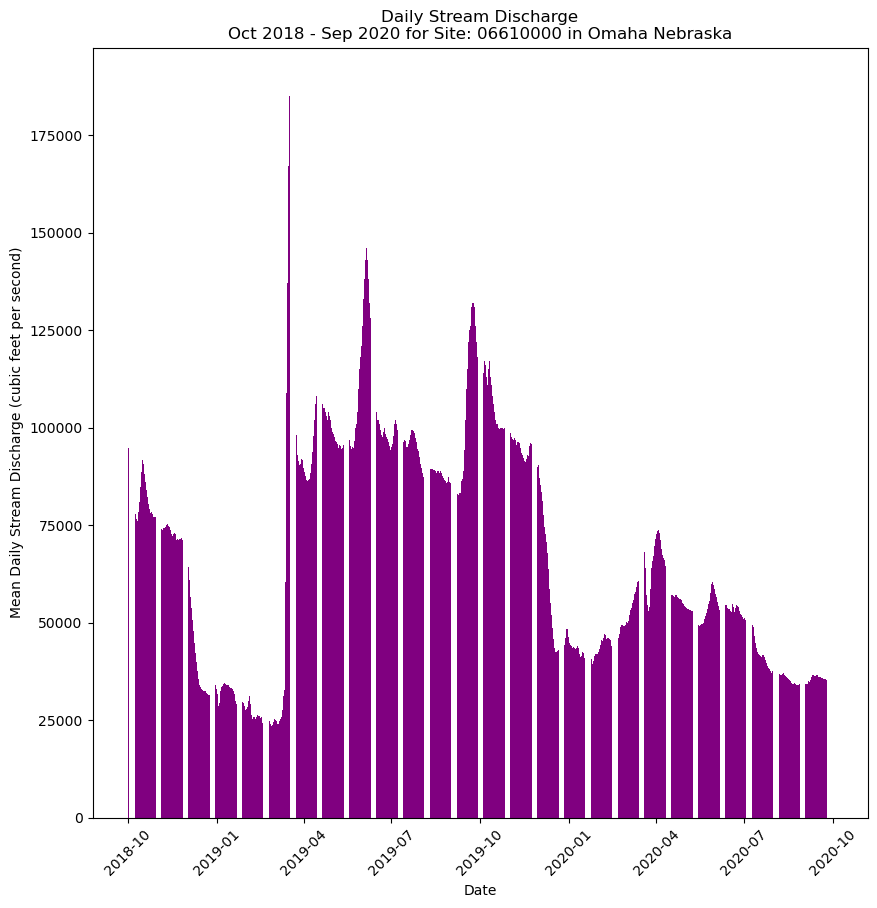

In [36]:
# YOUR CODE HERE
# raise NotImplementedError()
import matplotlib.pyplot as plt

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(df_subset.index.values,
       df_subset['discharge_cubic_feet_second_mean'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Mean Daily Stream Discharge (cubic feet per second)",
       title="Daily Stream Discharge\nOct 2018 - Sep 2020 for Site: 06610000 in Omaha Nebraska")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()


You should be able to see the flood in your data going up above 188,000 cfs at its peak in March 2019, as compared to the following year where the peak flow was 71,100 cfs. But how unusual is that really?

Let's start by plotting ALL the data. Then you can (optionally) use a return period **statistic** to quantify how unusual it was.

&#128187; In the cell below, plot the entire time series of streamflow data, without any parameters.

In [37]:
# YOUR CODE HERE
# raise NotImplementedError()

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 6))

print(df)

# Add x-axis and y-axis
ax.bar(df.index.values,
       df['discharge_cubic_feet_second_mean'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Mean Daily Stream Discharge (cubic feet per second)",
       title="Daily Stream Discharge\nOct 1928 - Sept 2022 for Site:, 06610000 in Omaha Nebraska")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

           data_provider  site_number  discharge_cubic_feet_second_mean  \
yyyy_mm_dd                                                                
1928-10-01          USGS      6610000                             20300   
1928-10-02          USGS      6610000                             19800   
1928-10-03          USGS      6610000                             19600   
1928-10-04          USGS      6610000                             19300   
1928-10-05          USGS      6610000                             19000   
...                  ...          ...                               ...   
2022-09-26          USGS      6610000                             32000   
2022-09-27          USGS      6610000                             31900   
2022-09-28          USGS      6610000                             32100   
2022-09-29          USGS      6610000                             32100   
2022-09-30          USGS      6610000                             32000   

           discharge_cub

This plot looks a little fuzzy because it is trying to fit too many data points in a small area. One way to improve this is by **resampling** the data to **annual maxima**. That way we still get the same peak streamflows, but the computer will be able to plot all the values without overlapping.

> **Resampling** means changing the time interval between time series observations - in this case from daily to annual.

&#128214; Read about [different ways to resample time series data in your textbook](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/resample-time-series-data-pandas-python/)

&#128214; You can use a [list of **offset aliases**](https://pandas.pydata.org/docs/dev/user_guide/timeseries.html#timeseries-offset-aliases) to look up how to specify the final dates. This list is pretty hard to find - you might want to bookmark it.

&#128187; In the cell below, select the streamflow column, and then resample it to get an annual maximum.

> GOTCHA ALERT - the test below is looking for a pandas `DataFrame`, but when we select a single column we get a pandas `Series` (a `DataFrame` is a collection of `Series` where each column is one `Series`.) To get a `DataFrame` with a single column, use the syntax below with **two** square brackets:

```python
dataframe[['column_name']]
```

In [ ]:
# YOUR CODE HERE
# raise NotImplementedError()

annual_df = df[['discharge_cubic_feet_second_mean']].resample('AS').sum()

print(annual_df)

print(round(int(annual_df.mean().iloc[0]), 0))

            discharge_cubic_feet_second_mean
yyyy_mm_dd                                  
1928-01-01                           1553350
1929-01-01                          13046320
1930-01-01                           9626520
1931-01-01                           5478070
1932-01-01                           9989770
...                                      ...
2018-01-01                          21056900
2019-01-01                          30564300
2020-01-01                          15941800
2021-01-01                          10513100
2022-01-01                           6973900

[95 rows x 1 columns]
12005514


In [ ]:
ans_resample = annual_df
resample_points = 0

# Answer should be a DataFrame
if isinstance(ans_resample, pd.DataFrame):
    print("\u2705 Great, you created a pandas DataFrame above")
    resample_points += 1
else:
    print("\u274C Oops - the cell above should have a DataFrame output.")

# Answer should include 95 years of data
if len(ans_resample)==95:
    print("\u2705 Your DataFrame has the right number of years")
    resample_points += 2
else:
    print("\u274C Oops - did you resample your DataFrame to annual?")

# The mean of the streamflow Series should be 85074
if round(int(ans_resample.mean().iloc[0]), 0)==85074:
    print("\u2705 Your annual max streamflow DataFrame has the expected "
          "values in it, good job!")
    resample_points += 2
else:
    print("\u274C Your annual max streamflow DataFrame does not have the "
          "expected values in it.")

print("\u27A1 You received {} out of 5 points for subsetting the "
      "streamflow data.".format(
    resample_points))
resample_points

✅ Great, you created a pandas DataFrame above
✅ Your DataFrame has the right number of years
❌ Your annual max streamflow DataFrame does not have the expected values in it.
➡ You received 3 out of 5 points for subsetting the streamflow data.


3

&#128187; Plot your resampled data.

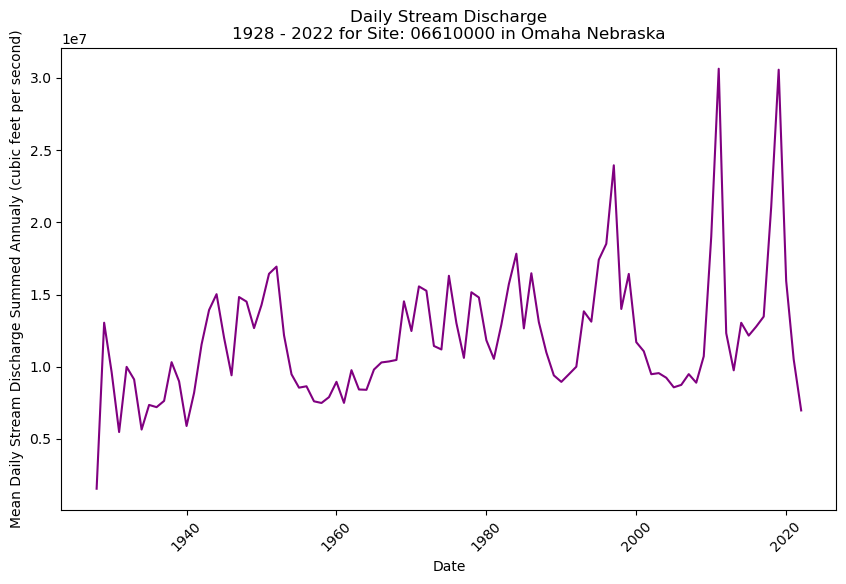

In [ ]:
# YOUR CODE HERE
# raise NotImplementedError()

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 6))
# Add x-axis and y-axis
ax.plot(annual_df.index.values,
       annual_df['discharge_cubic_feet_second_mean'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Mean Daily Stream Discharge Summed Annualy (cubic feet per second)",
       title="Daily Stream Discharge\n1928 - 2022 for Site: 06610000 in Omaha Nebraska")

#plt.axhline(y=annual_df['2019-03-01':'2019-12-31']['discharge_cubic_feet_second_mean'].max())

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

In the cell below, write a headline and 2-3 sentence description of your plot. What do you estimate the return period was for the flood in 2019?

Given that no other flood was as anywhere as high as was seen in 2019, there is likely an over 100 year return period for that kind of flood that was seen.

> It turns out that the USGS also has **peak streamflow** values for years going back to the 1800s in Omaha. For your own analysis, one option would be to analyse the peak streamflow values instead, and compare them to the ones you computed in the years you have data. **GOTCHA ALERT** - the peak streamflow values from the USGS will be higher, because the daily data is a daily **average** rather than an instantaneous **maximum** like the peak flow.

## STEP 6 (OPTIONAL): CALCULATE THE FLOOD RETURN PERIOD 

&#127798; EXTRA CHALLENGE In the cell below, calculate the exceedence probability and return period for each year of the **annual** data, and add them as columns to your DataFrame. To pass the tests, subset data after 1953, when there was a regime change evident on the river. What do you think caused that?.

> HINT: pandas columns have a `rank` method, which you can use. BUT -- you will need to use the `ascending=False` parameter, since higher rank should be lower exceedence probability 

In [ ]:
# YOUR CODE HERE
# raise NotImplementedError()

import requests

# Replace with the URL you want to request
omaha_max_data_url = ("https://nwis.waterdata.usgs.gov/nwis/"
                    "peak?site_no=06610000&agency_cd=USGS&format=rdb")


# Send an HTTP GET request to the URL
omaha_max_data = requests.get(omaha_max_data_url)

# Check if the request was successful (status code 200)
if omaha_max_data.status_code == 200:
    # Print the content of the response (HTML, JSON, etc.)
    print(omaha_max_data.text)
else:
    print(f"Request failed with status code {(omaha_max_data.status_code)}")



#
# U.S. Geological Survey
# National Water Information System
# Retrieved: 2023-10-10 19:49:01 EDT
#
# ---------------------------------- WARNING ----------------------------------------
# Some of the data that you have obtained from this U.S. Geological Survey database
# may not have received Director's approval. Any such data values are qualified
# as provisional and are subject to revision. Provisional data are released on the
# condition that neither the USGS nor the United States Government may be held liable
# for any damages resulting from its use.
#
# More data may be available offline.
# For more information on these data,  contact  USGS Water Data Inquiries.
# This file contains the annual peak streamflow data.
#
# This information includes the following fields:
#
#  agency_cd     Agency Code
#  site_no       USGS station number
#  peak_dt       Date of peak streamflow (format YYYY-MM-DD)
#  peak_tm       Time of peak streamflow (24 hour format, 00:00 - 23:59)
#  peak_va    

In [ ]:
# YOUR CODE HERE
# raise NotImplementedError()
from io import BytesIO

import pandas as pd

# Define Custom Names for the data columns


df = pd.read_csv(
    BytesIO(omaha_max_data.content),
    comment='#',
    delimiter='\t',
    skiprows=[73],
    index_col='peak_dt',
    parse_dates=True,
)

print(df)

           agency_cd  site_no peak_tm   peak_va  peak_cd  gage_ht  gage_ht_cd  \
peak_dt                                                                         
1881-04-25      USGS  6610000     NaN       NaN      NaN    24.65         3.0   
1929-06-07      USGS  6610000     NaN  198000.0      NaN    14.28         NaN   
1930-03-15      USGS  6610000     NaN   84400.0      NaN    11.90         6.0   
1931-06-18      USGS  6610000     NaN   52800.0      NaN    10.85         NaN   
1932-06-19      USGS  6610000     NaN  137000.0      NaN    15.12         NaN   
...              ...      ...     ...       ...      ...      ...         ...   
2018-09-26      USGS  6610000   14:30  114000.0      6.0    28.66         2.0   
2019-03-18      USGS  6610000   12:45  189000.0      6.0    34.10         2.0   
2019-10-06      USGS  6610000   14:30  118000.0      6.0    28.78         NaN   
2020-10-20      USGS  6610000   22:45   38000.0      6.0    15.32         2.0   
2021-10-13      USGS  661000

In [ ]:
# Subset Data and Resample
df_omaha_max_after_1953 = df["1952-01-01":]

df_omaha_max_after_1953 = df["1952-01-01":]

annual_omaha_max = (df_omaha_max_after_1953[['peak_va']]
                    .resample('AS').sum())

print(annual_omaha_max)

             peak_va
peak_dt             
1952-01-01  396000.0
1953-01-01  112000.0
1954-01-01   87400.0
1955-01-01   51500.0
1956-01-01   42600.0
...              ...
2017-01-01   61400.0
2018-01-01  114000.0
2019-01-01  307000.0
2020-01-01   38000.0
2021-01-01   36000.0

[70 rows x 1 columns]


In [ ]:
def calculate_return(df, colname):
   
    # Sort data smallest to largest
    sorted_data = df  # already sorted before this

    # Count total obervations
    n = sorted_data.shape[0]
    
    # Add a numbered column 1 -> n to use in return calculation for rank
        #sorted_data.insert(0, 'rank', range(1, 1 + n),ascending=False)
    sorted_data['rank'] = sorted_data[colname].rank(ascending=False)
    
    # Calculate probability
    sorted_data["probability"] = (n - sorted_data["rank"] + 1) / (n + 1)
    
    # Calculate return - data are daily to then divide by 365?
    sorted_data["return-years"] = (1 / sorted_data["probability"])

    return(sorted_data)

annual_omaha_max = calculate_return(annual_omaha_max, "peak_va")

# Because these data are daily,
# divide return period in days by 365 to get a return period in years
annual_omaha_max["return-years"] = (annual_omaha_max["return-years"]
                                     / 365)
annual_omaha_max["probability"] = annual_omaha_max["probability"] * 365

annual_omaha_max = annual_omaha_max[["peak_va"]]

annual_omaha_max.tail()



,peak_va
peak_dt,
2017-01-01,61400.0
2018-01-01,114000.0
2019-01-01,307000.0
2020-01-01,38000.0
2021-01-01,36000.0


In [ ]:
print(annual_omaha_max)

print(round(annual_omaha_max.mean().product(), 0))  # should be 171186

             peak_va
peak_dt             
1952-01-01  396000.0
1953-01-01  112000.0
1954-01-01   87400.0
1955-01-01   51500.0
1956-01-01   42600.0
...              ...
2017-01-01   61400.0
2018-01-01  114000.0
2019-01-01  307000.0
2020-01-01   38000.0
2021-01-01   36000.0

[70 rows x 1 columns]
80849.0


In [ ]:
ans_return = annual_omaha_max
return_points = 0

# Answer should be a DataFrame
if isinstance(ans_return, pd.DataFrame):
    print("\u2705 Great, you created a pandas dataframe above")
    return_points += 1
else:
    print("\u274C Oops - the cell above should have a DataFrame output.")

# Answer should include 70 years of data
if len(ans_return)==70:
    print("\u2705 Your DataFrame has the right number of days")
    return_points += 2
elif len(ans_return) > 70:
    print("\u274C Your DataFrame has too many years.")
else:
    print("\u274C Your DataFrame has too few years.")

# The value "hash" should be 171186.0
if round(ans_return.mean().product(), 0)==171186.0:
    print("\u2705 Your streamflow DataFrame has the expected values "
          "in it, good job!")
    return_points += 2
else:
    print("\u274C Your streamflow DataFrame does not have the "
          "expected values in it.")
    
    # Subtract one point for any PEP-8 errors
tmp_path = "tmp.py"
with open(tmp_path, "w") as tmp_file:
    tmp_file.write(In[-2])
ignore_flake8 = 'W292,F401,E302,F821,W503'
flake8_out = subprocess.run(
    ['flake8', 
     '--ignore', ignore_flake8, 
     '--import-order-style', 'edited',
     '--count', 
     tmp_path],
    stdout=subprocess.PIPE,
).stdout.decode("ascii")
print(flake8_out)
return_points -= int(flake8_out.splitlines()[-1])

print("\u27A1 You received {} out of 5 extra credit points for calculating "
      "return periods.".format(return_points))
return_points

✅ Great, you created a pandas dataframe above
✅ Your DataFrame has the right number of days
❌ Your streamflow DataFrame does not have the expected values in it.


0

➡ You received 3 out of 5 extra credit points for calculating return periods.


3